# Week 3 Homework

Utilize the scikit-learn California Housing dataset for the following exercise  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

In [56]:
# Importing

import numpy as np
import matplotlib
%matplotlib inline
import postgresql
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer


## 1. Download the dataset and build DataFrames for X and y

In [5]:
# # data = sklearn.datasets.fetch_california_housing()
# from sklearn.datasets.california_housing import fetch_california_housing
# fetch_california_housing()
# df = fetch_california_housing()
# df.data
# df.target

# df.feature_names
# type(df)

from sklearn.datasets.california_housing import fetch_california_housing

df = fetch_california_housing()

df = pd.DataFrame(df.data, columns=df.feature_names)



In [6]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [7]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


## 2. Are there columns that look like they need a type change?

In [14]:
for column in df.columns:
    if df[column].dtype == type(np.float64):
        le = sklearn.preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])
        df[column] = df[column].astype(np.int)

In [22]:
for column in df.columns:
    df[column] = df[column].astype(int)

In [23]:
df.dtypes

MedInc        int32
HouseAge      int32
AveRooms      int32
AveBedrms     int32
Population    int32
AveOccup      int32
Latitude      int32
Longitude     int32
dtype: object

In [24]:


x_df = df.drop(columns='MedInc')
y_df = df['MedInc']

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df)

X_train.head()


,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5212,45,4,0,448,3,33,-118
9298,34,6,1,815,2,38,-122
467,52,4,1,571,1,37,-122
8498,33,4,1,1072,2,33,-118
16925,44,4,1,1141,2,37,-122


In [25]:
y_train.head()

5212     3
9298     6
467      2
8498     2
16925    3
Name: MedInc, dtype: int32

## 3. Build a K-NN Regressor and fit it

In [32]:
clf = KNeighborsClassifier(n_neighbors = 3)

clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [33]:
clf.predict(X_test)

array([4, 3, 2, ..., 3, 1, 2])

## 4. Try several different parameter values, especially for number of neighbors.  Keep the optimal result that you encounter while testing.

In [52]:
clf = KNeighborsClassifier(n_neighbors = 9)

clf.fit(X_train, y_train)
clf.predict(X_test)

array([2, 3, 3, ..., 3, 1, 2])

## 5. Split your data into training and testing datasets

In [ ]:
from sklearn.model_selection import train_test_split

X, y = 

## 6. Determing model accuracy or efficacy is slightly harder with a regression.  What is your mean absolute error from the model?

In [53]:
print('Accuracy is',(clf.score(X_test, y_test))*100)

Accuracy is 22.05426356589147


## 7. Chart your predictions vs the actuals.

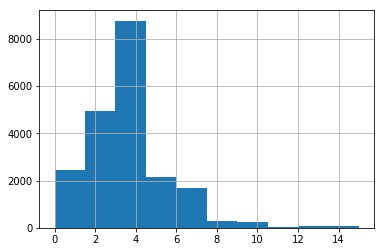

In [57]:
y_df.hist()